In [53]:
import numpy as np
import pandas as pd
import tarfile
import urllib.request
from pathlib import Path


def load_housing_data():
    tarball_path = Path("numpyex/housing.tgz")
    if not tarball_path.is_file():
        Path("numpyex").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="numpyex")
    return pd.read_csv(Path("numpyex/housing/housing.csv"))
house=load_housing_data()
house.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


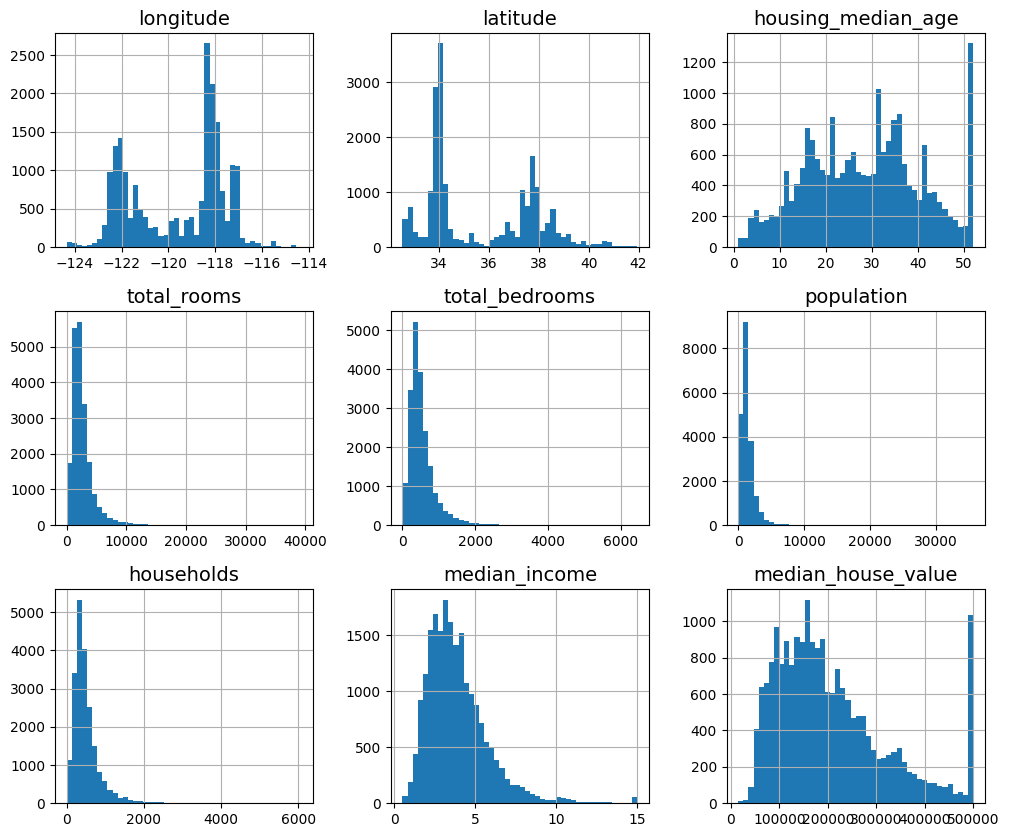

In [55]:

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
house.hist(bins=46,figsize=(12,10))
plt.show()










    


In [56]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(house, test_size=0.2)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15757,-118.31,34.13,40.0,2822.0,443.0,907.0,414.0,7.2692,498700.0,<1H OCEAN
10479,-121.99,37.98,23.0,2293.0,411.0,969.0,399.0,4.4536,184000.0,INLAND
331,-119.73,36.62,35.0,2080.0,365.0,1026.0,333.0,3.5781,92800.0,INLAND
13992,-118.47,34.06,26.0,6577.0,1789.0,2937.0,1652.0,4.8010,500001.0,<1H OCEAN
3063,-122.39,37.60,36.0,1770.0,499.0,1225.0,459.0,2.5600,273100.0,NEAR OCEAN


In [57]:
house["med_inc_cat"] = pd.cut(house["median_income"], bins=[0, 1, 3, 4, 6, np.inf], labels=[1, 2, 3, 4, 5])

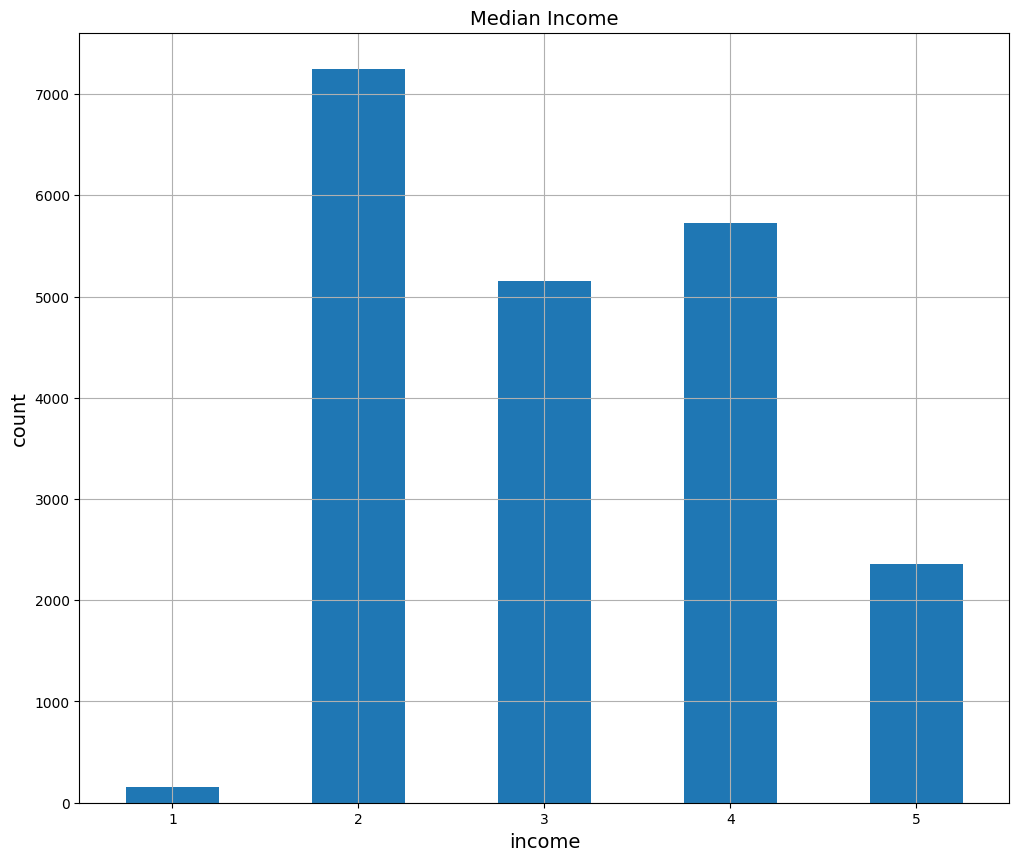

In [58]:
house["med_inc_cat"].value_counts().sort_index().plot.bar(rot=0, figsize=(12,10),grid=True)
plt.title("Median Income")
plt.xlabel("income")
plt.ylabel("count")
plt.show()

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_train_set, strat_test_set = train_test_split(
house, test_size=0.2, stratify=house["med_inc_cat"], random_state=42)
strat_test_set["med_inc_cat"].value_counts() / len(strat_test_set)

    
    
    
    
    
    
    
    


med_inc_cat
2    0.351017
4    0.277374
3    0.249516
5    0.114341
1    0.007752
Name: count, dtype: float64

In [60]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("med_inc_cat", axis=1, inplace=True)

In [61]:
strat_train_set.copy()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13671,-121.95,37.29,30.0,3734.0,813.0,1834.0,824.0,3.4505,260000.0,<1H OCEAN
399,-122.05,37.38,24.0,2424.0,501.0,1367.0,507.0,4.0720,364200.0,<1H OCEAN
260,-117.63,33.47,4.0,2320.0,405.0,1408.0,477.0,6.3369,256000.0,NEAR OCEAN
13793,-124.17,40.80,52.0,1606.0,419.0,891.0,367.0,1.5850,75500.0,NEAR OCEAN
5542,-118.24,34.16,52.0,850.0,162.0,493.0,160.0,6.9408,298800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
4207,-120.95,37.73,12.0,3609.0,712.0,2650.0,742.0,2.8565,92700.0,INLAND
6180,-122.48,37.65,39.0,3348.0,666.0,1817.0,668.0,4.2593,227400.0,NEAR OCEAN
1741,-120.58,38.77,21.0,1661.0,406.0,789.0,319.0,2.3583,108700.0,INLAND
11854,-118.13,33.77,37.0,4365.0,926.0,1661.0,868.0,5.3046,360700.0,NEAR OCEAN


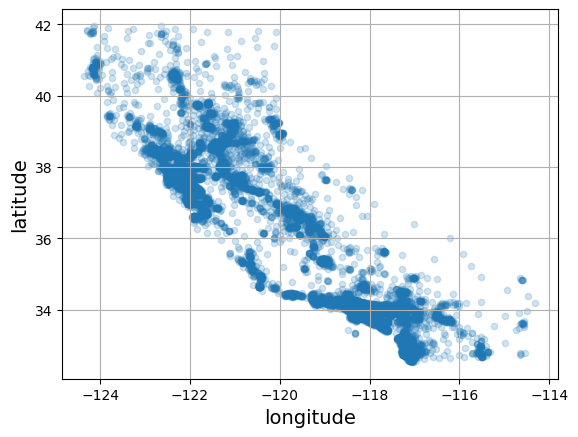

In [62]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",alpha=0.2)
plt.show()

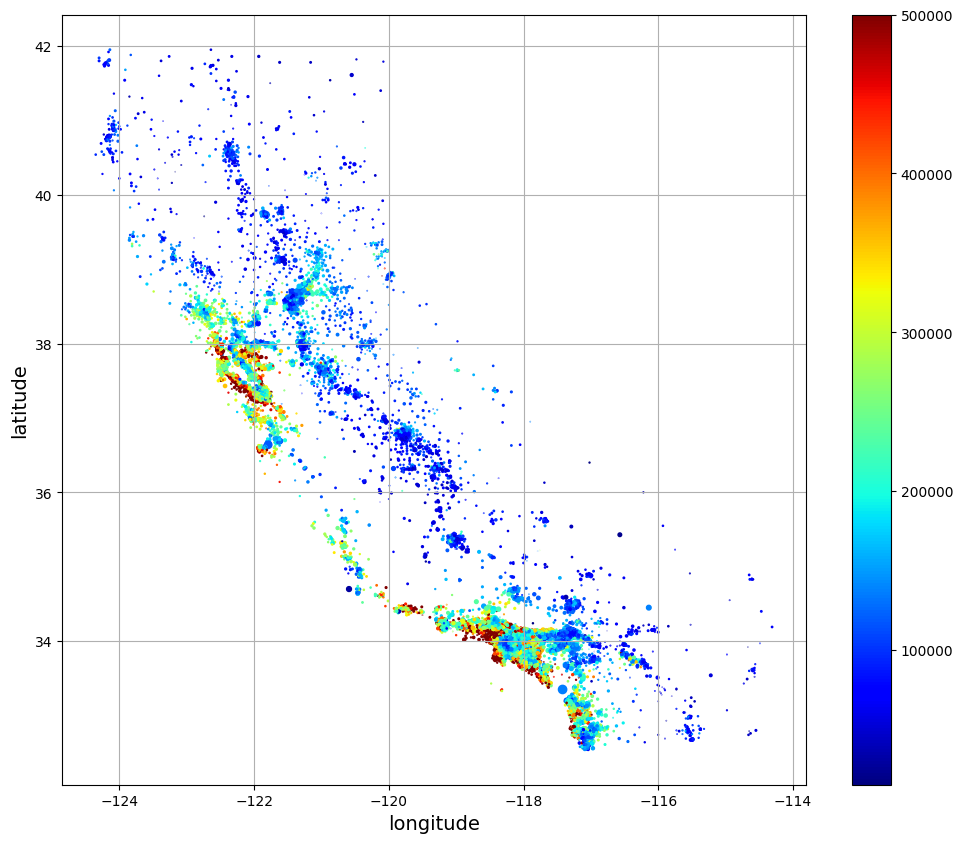

In [63]:
house.plot(kind="scatter",x="longitude",y="latitude",grid="True",s=(house["population"])/1000,c=house["median_house_value"],cmap="jet",colorbar=True,legend=True
,figsize=(12,10))
plt.show()

ValueError: could not convert string to float: 'NEAR BAY'